Coefficients: [ -3.68423347   5.19754575  -3.52140542   3.95637111   2.89814686
  26.56560041   1.43996367  -7.21554049   1.87249312  -3.80087661
  -5.13049328   5.27639879 -22.54083228]
B: 12.108016257484698
Learning rate 0.1
Lowest cost: 12.935050499852817


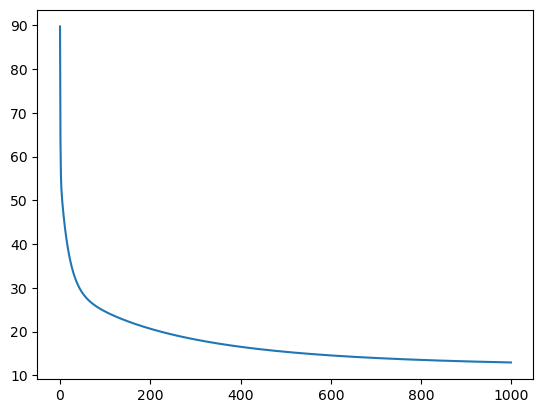

In [31]:
import matplotlib.pyplot as plt
import numpy as np


class LinearRegression:
    def __init__(self, csv_path, y_column_name):
        self.fields = np.loadtxt(csv_path, delimiter=',', max_rows=1, dtype=str)
        self.np_data_arr = np.loadtxt(csv_path, delimiter=',', skiprows=1,dtype=float)
        self.Y_train = self.np_data_arr[:, np.where(self.fields == y_column_name)[0]].flatten()
        self.X_train = np.delete(self.np_data_arr, np.where(self.fields == y_column_name)[0], 1)
        self.alpha = .001
        self.colCount = self.X_train.shape[1]
        self.w_list = np.array([1.0 for i in range(self.colCount)])
        self.b = 0.0
        self.costs = []
        self.max = [self.X_train[:,i].max() for i in range(self.colCount)]
        for i in range(self.colCount):
            self.X_train[:,i] /= self.max[i]

    def __str__(self):
        plt.plot(self.costs)
        return f'Coefficients: {self.w_list}\nB: {self.b}\nLearning rate {self.alpha}\nLowest cost: {self.costs[-1]}'

    def set_alpha(self, alpha):
        self.alpha = alpha

    def predict(self, input_values, scaled = True):
        answer = self.b
        if not scaled:
            for i in range(len(input_values)):
                input_values[i] = input_values[i] / self.max[i]
        answer += np.dot(input_values, self.w_list)
        return answer

    def _cost(self):
        m = self.X_train.shape[0]
        answer = 0
        for j, value in enumerate(self.X_train):
            answer += (self.predict(value) - self.Y_train[j]) ** 2
        answer /= 2*m
        return answer

    def _update(self):
        new_w_list = self.w_list.copy()
        for i in range(len(self.w_list)):
            w_derivative = 0
            for j, value in enumerate(self.X_train):
                pred = self.predict(value)
                err = pred - self.Y_train[j]
                w_derivative += err * value[i]

            w_derivative /= self.X_train.shape[0]
            new_w_list[i] = new_w_list[i] - self.alpha * w_derivative

        w_derivative = 0
        for j, value in enumerate(self.X_train):
            w_derivative += self.predict(value) - self.Y_train[j]

        w_derivative /= self.X_train.shape[0]
        self.b = self.b - self.alpha*w_derivative
        return new_w_list, self.b

    def train(self,iterations):
        for i in range(iterations):
            self.w_list, self.b = self._update()
            self.costs.append(self._cost())
        return True

if __name__ == '__main__':
    l = LinearRegression(csv_path='data/Boston.csv', y_column_name='MEDV')
    l.set_alpha(0.1)
    l.train(1000)
    l.predict(np.array([0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0,15.3,396.9,4.98]), False)
    print(l)





